In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/sirapat-thianphan/SeminarII_Sirapat/master/events_bs2_2.csv'
loaded_data = pd.read_csv(url, sep=',', header=0)

In [4]:
loaded_data.head(10)

,tactic0_id,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,1,101.19182,6.13009,3467.485002,85.604275,0.3,0.25,927.963005,5,1308.145156,0.7,284.929088,3,27.677967
1,0,101.26577,6.41964,972.895329,1515.131446,0.3,0.25,1855.001821,4,2805.680397,0.7,1321.192664,1,1077.837387
2,1,101.14605,6.68195,4535.321847,372.279866,0.7,1.00,294.153727,7,212.795421,0.7,323.187802,10,97.315259
3,1,101.22266,6.85446,240.146910,333.135614,0.3,0.25,1591.508482,3,407.629181,0.3,155.356802,3,6.634046
4,0,101.34695,6.45786,242.448908,1172.773291,0.3,0.25,558.423389,5,701.641769,0.7,620.660475,5,31.915022
5,0,100.97757,6.65426,4096.016638,1315.821482,0.3,0.25,1716.603590,5,6956.354136,0.3,14218.082300,5,1124.033888
6,0,101.74995,6.27591,2686.242719,932.762119,0.7,1.00,1707.460629,4,3448.168296,0.7,69.781556,6,71.977883
7,0,101.62470,6.71488,580.185597,403.194092,0.3,0.25,567.060214,4,1545.663021,0.7,80.889155,4,35.425075
8,1,101.28660,6.72085,302.995168,143.336508,0.7,1.00,1104.123671,4,363.863675,0.7,1144.968962,3,25.827262
9,0,101.45094,6.49835,2562.292453,250.031476,0.3,0.25,3504.811321,4,7015.471466,0.7,2175.258547,6,14.428984


In [5]:
X_pre = loaded_data.iloc[:,1:]
y_pre = loaded_data.iloc[:,0]

In [6]:
X_pre.head(5)

,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,101.19182,6.13009,3467.485002,85.604275,0.3,0.25,927.963005,5,1308.145156,0.7,284.929088,3,27.677967
1,101.26577,6.41964,972.895329,1515.131446,0.3,0.25,1855.001821,4,2805.680397,0.7,1321.192664,1,1077.837387
2,101.14605,6.68195,4535.321847,372.279866,0.7,1.00,294.153727,7,212.795421,0.7,323.187802,10,97.315259
3,101.22266,6.85446,240.146910,333.135614,0.3,0.25,1591.508482,3,407.629181,0.3,155.356802,3,6.634046
4,101.34695,6.45786,242.448908,1172.773291,0.3,0.25,558.423389,5,701.641769,0.7,620.660475,5,31.915022


In [7]:
y_pre.head(5)

0    1
1    0
2    1
3    1
4    0
Name: tactic0_id, dtype: int64

In [9]:
#standardizing the input feature
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X_pre)

/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
df = pd.DataFrame(data=X)   
df.head(5)                          # We still the zero problem in the column 4, 5 and 9

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.491497,0.254955,0.107703,0.005184,0.0,0.0,0.028806,0.363636,0.037864,1.0,0.006080,0.222222,0.001228
1,0.533348,0.455602,0.030219,0.091754,0.0,0.0,0.057583,0.272727,0.081210,1.0,0.028261,0.000000,0.047830
2,0.465594,0.637373,0.140871,0.022545,1.0,1.0,0.009131,0.545455,0.006159,1.0,0.006899,1.000000,0.004318
3,0.508950,0.756916,0.007459,0.020174,0.0,0.0,0.049404,0.181818,0.011799,0.0,0.003306,0.222222,0.000294
4,0.579290,0.482087,0.007531,0.071022,0.0,0.0,0.017335,0.363636,0.020309,1.0,0.013266,0.444444,0.001416


In [12]:
X_pre_numpy = X_pre.values  # convert panda dataframe to numpy array
X_pre_numpy

array([[1.01191820e+02, 6.13009000e+00, 3.46748500e+03, ...,
        2.84929088e+02, 3.00000000e+00, 2.76779675e+01],
       [1.01265770e+02, 6.41964000e+00, 9.72895329e+02, ...,
        1.32119266e+03, 1.00000000e+00, 1.07783739e+03],
       [1.01146050e+02, 6.68195000e+00, 4.53532185e+03, ...,
        3.23187802e+02, 1.00000000e+01, 9.73152590e+01],
       ...,
       [1.00829740e+02, 6.66129000e+00, 6.35483105e+03, ...,
        2.24800867e+04, 5.00000000e+00, 3.82198525e+03],
       [1.01305360e+02, 6.55308000e+00, 1.66363464e+02, ...,
        3.23205756e+02, 6.00000000e+00, 7.04019195e+01],
       [1.01554750e+02, 6.42124000e+00, 3.85837311e+03, ...,
        1.95051624e+02, 5.00000000e+00, 1.68364332e+02]])

In [13]:
X[:, 4] = X_pre_numpy[:, 4]
X[:, 5] = X_pre_numpy[:, 5]
X[:, 9] = X_pre_numpy[:, 9]

In [14]:
df = pd.DataFrame(data=X)   
df.head(5)                          # Now, the zero problems are already solved

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.491497,0.254955,0.107703,0.005184,0.3,0.25,0.028806,0.363636,0.037864,0.7,0.006080,0.222222,0.001228
1,0.533348,0.455602,0.030219,0.091754,0.3,0.25,0.057583,0.272727,0.081210,0.7,0.028261,0.000000,0.047830
2,0.465594,0.637373,0.140871,0.022545,0.7,1.00,0.009131,0.545455,0.006159,0.7,0.006899,1.000000,0.004318
3,0.508950,0.756916,0.007459,0.020174,0.3,0.25,0.049404,0.181818,0.011799,0.3,0.003306,0.222222,0.000294
4,0.579290,0.482087,0.007531,0.071022,0.3,0.25,0.017335,0.363636,0.020309,0.7,0.013266,0.444444,0.001416


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pre, test_size=0.2)

In [17]:
X_train[0]

array([0.96363873, 0.35831693, 0.08574365, 0.0319393 , 0.7       ,
       1.        , 0.05352891, 0.18181818, 0.10715836, 0.7       ,
       0.05303056, 0.        , 0.01554384])

In [18]:
from keras import Sequential
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [19]:
## NN Model 1 ( 8, 16 , 16, 1 )
# output = activation(dot(input, kernel) + bias)
classifier1 = Sequential()
#First Hidden Layer
classifier1.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier1.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier1.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier1.add(layers.Dropout(0.3))
#Output Layer
classifier1.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier1.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [20]:
## NN Model 2 ( 16, 32 , 32, 1 )
# output = activation(dot(input, kernel) + bias)
classifier2 = Sequential()
#First Hidden Layer
classifier2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier2.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier2.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier2.add(layers.Dropout(0.3))
#Output Layer
classifier2.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier2.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [21]:
## NN Model 3 ( 32, 64 , 64, 1 )
# output = activation(dot(input, kernel) + bias)
classifier3 = Sequential()
#First Hidden Layer
classifier3.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier3.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier3.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier3.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier3.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier3.add(layers.Dropout(0.3))
#Output Layer
classifier3.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier3.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [22]:
# Validation Approach
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]



In [23]:
classifier1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = classifier1.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 2s 351us/step - loss: 0.7208 - acc: 0.5409 - val_loss: 0.7145 - val_acc: 0.5550
Epoch 2/100
5400/5400 [==============================] - 0s 52us/step - loss: 0.7109 - acc: 0.5546 - val_loss: 0.7040 - val_acc: 0.5770
Epoch 3/100
5400/5400 [==============================] - 0s 49us/step - loss: 0.7023 - acc: 0.5694 - val_loss: 0.6965 - val_acc: 0.5850
Epoch 4/100
5400/5400 [==============================] - 0s 42us/step - loss: 0.6955 - acc: 0.5820 - val_loss: 0.6899 - val_acc: 0.5900
Epoch 5/100
5400/5400 [==============================] - 0s 57us/step - loss: 0.6899 - acc: 0.5894 - val_loss: 0.6848 - val_acc: 0.6060
Epoch 6/100
5400/5400 [==============================] - 0s 51us/step - loss: 0.6858 - acc: 0.5891 - val_loss: 0.6806 - val_acc: 0.6070
Epoch 7/100
5400/5400 [==============================] - 0s 63us/step - loss: 0.6829 - acc: 0.5913 - val_loss: 0.6782 - val_acc: 0.6050

5400/5400 [==============================] - 0s 44us/step - loss: 0.6557 - acc: 0.6174 - val_loss: 0.6549 - val_acc: 0.6260
Epoch 61/100
5400/5400 [==============================] - 0s 43us/step - loss: 0.6546 - acc: 0.6181 - val_loss: 0.6662 - val_acc: 0.6040
Epoch 62/100
5400/5400 [==============================] - 0s 39us/step - loss: 0.6546 - acc: 0.6235 - val_loss: 0.6540 - val_acc: 0.6220
Epoch 63/100
5400/5400 [==============================] - 0s 40us/step - loss: 0.6540 - acc: 0.6202 - val_loss: 0.6535 - val_acc: 0.6230
Epoch 64/100
5400/5400 [==============================] - 0s 41us/step - loss: 0.6540 - acc: 0.6176 - val_loss: 0.6587 - val_acc: 0.6140
Epoch 65/100
5400/5400 [==============================] - 0s 39us/step - loss: 0.6542 - acc: 0.6233 - val_loss: 0.6598 - val_acc: 0.6130
Epoch 66/100
5400/5400 [==============================] - 0s 59us/step - loss: 0.6536 - acc: 0.6183 - val_loss: 0.6528 - val_acc: 0.6290
Epoch 67/100
5400/5400 [==============================

In [24]:
classifier2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = classifier2.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 1s 275us/step - loss: 0.7472 - acc: 0.5494 - val_loss: 0.7319 - val_acc: 0.6070
Epoch 2/100
5400/5400 [==============================] - 0s 66us/step - loss: 0.7267 - acc: 0.5907 - val_loss: 0.7146 - val_acc: 0.6090
Epoch 3/100
5400/5400 [==============================] - 0s 50us/step - loss: 0.7109 - acc: 0.5943 - val_loss: 0.7024 - val_acc: 0.6230
Epoch 4/100
5400/5400 [==============================] - 0s 51us/step - loss: 0.6999 - acc: 0.6057 - val_loss: 0.6965 - val_acc: 0.6090
Epoch 5/100
5400/5400 [==============================] - 0s 49us/step - loss: 0.6920 - acc: 0.6063 - val_loss: 0.6881 - val_acc: 0.6180
Epoch 6/100
5400/5400 [==============================] - 1s 139us/step - loss: 0.6862 - acc: 0.6126 - val_loss: 0.6905 - val_acc: 0.5950
Epoch 7/100
5400/5400 [==============================] - 0s 74us/step - loss: 0.6822 - acc: 0.6178 - val_loss: 0.6888 - val_acc: 0.586

5400/5400 [==============================] - 0s 69us/step - loss: 0.6492 - acc: 0.6389 - val_loss: 0.6467 - val_acc: 0.6400
Epoch 61/100
5400/5400 [==============================] - 0s 77us/step - loss: 0.6485 - acc: 0.6417 - val_loss: 0.6613 - val_acc: 0.6310
Epoch 62/100
5400/5400 [==============================] - 0s 72us/step - loss: 0.6487 - acc: 0.6470 - val_loss: 0.6495 - val_acc: 0.6370
Epoch 63/100
5400/5400 [==============================] - 0s 71us/step - loss: 0.6494 - acc: 0.6454 - val_loss: 0.6514 - val_acc: 0.6310
Epoch 64/100
5400/5400 [==============================] - 0s 53us/step - loss: 0.6494 - acc: 0.6396 - val_loss: 0.6480 - val_acc: 0.6450
Epoch 65/100
5400/5400 [==============================] - 0s 52us/step - loss: 0.6487 - acc: 0.6420 - val_loss: 0.6496 - val_acc: 0.6370
Epoch 66/100
5400/5400 [==============================] - 0s 67us/step - loss: 0.6491 - acc: 0.6430 - val_loss: 0.6468 - val_acc: 0.6380
Epoch 67/100
5400/5400 [==============================

In [25]:
classifier3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = classifier3.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 2s 305us/step - loss: 0.7835 - acc: 0.5519 - val_loss: 0.7586 - val_acc: 0.5690
Epoch 2/100
5400/5400 [==============================] - 1s 102us/step - loss: 0.7412 - acc: 0.5780 - val_loss: 0.7296 - val_acc: 0.5890
Epoch 3/100
5400/5400 [==============================] - 1s 115us/step - loss: 0.7147 - acc: 0.5941 - val_loss: 0.7048 - val_acc: 0.6160
Epoch 4/100
5400/5400 [==============================] - 1s 108us/step - loss: 0.7001 - acc: 0.5939 - val_loss: 0.6945 - val_acc: 0.6190
Epoch 5/100
5400/5400 [==============================] - 1s 175us/step - loss: 0.6905 - acc: 0.6085 - val_loss: 0.6901 - val_acc: 0.6040
Epoch 6/100
5400/5400 [==============================] - 1s 141us/step - loss: 0.6866 - acc: 0.6067 - val_loss: 0.6884 - val_acc: 0.6040
Epoch 7/100
5400/5400 [==============================] - 1s 149us/step - loss: 0.6831 - acc: 0.6148 - val_loss: 0.6831 - val_acc: 

5400/5400 [==============================] - 1s 151us/step - loss: 0.6493 - acc: 0.6380 - val_loss: 0.6474 - val_acc: 0.6400
Epoch 61/100
5400/5400 [==============================] - 1s 171us/step - loss: 0.6483 - acc: 0.6400 - val_loss: 0.6535 - val_acc: 0.6350
Epoch 62/100
5400/5400 [==============================] - 1s 154us/step - loss: 0.6488 - acc: 0.6420 - val_loss: 0.6605 - val_acc: 0.6220
Epoch 63/100
5400/5400 [==============================] - 1s 147us/step - loss: 0.6483 - acc: 0.6422 - val_loss: 0.6563 - val_acc: 0.6240
Epoch 64/100
5400/5400 [==============================] - 1s 183us/step - loss: 0.6472 - acc: 0.6398 - val_loss: 0.7700 - val_acc: 0.5430
Epoch 65/100
5400/5400 [==============================] - 1s 176us/step - loss: 0.6496 - acc: 0.6396 - val_loss: 0.6491 - val_acc: 0.6300
Epoch 66/100
5400/5400 [==============================] - 1s 127us/step - loss: 0.6492 - acc: 0.6393 - val_loss: 0.6454 - val_acc: 0.6410
Epoch 67/100
5400/5400 [=======================

In [26]:
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history

history_dict1.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

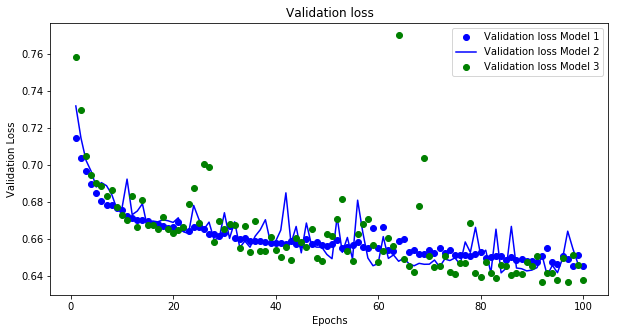

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

history_dict1 = history1.history
val_loss_values_1 = history_dict1['val_loss']
val_loss_values_2 = history_dict2['val_loss']
val_loss_values_3 = history_dict3['val_loss']

epochs = range(1, len(history_dict1['acc']) + 1 )

plt.plot(epochs, val_loss_values_1, 'bo', label='Validation loss Model 1')
plt.plot(epochs, val_loss_values_2, 'b', label='Validation loss Model 2')
plt.plot(epochs, val_loss_values_3, 'go', label='Validation loss Model 3')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

In [28]:
# NN Model 2 Training again with epochs = 15
# output = activation(dot(input, kernel) + bias)
classifier = Sequential()
#First Hidden Layer
classifier.add(layers.Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=13))  
#Second  Hidden Layer
classifier.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(layers.Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=30, batch_size=128)
results = classifier.evaluate(X_test, y_test)

Epoch 1/30
6400/6400 [==============================] - 1s 172us/step - loss: 0.6931 - acc: 0.5086
Epoch 2/30
6400/6400 [==============================] - 0s 55us/step - loss: 0.6912 - acc: 0.5494
Epoch 3/30
6400/6400 [==============================] - 0s 51us/step - loss: 0.6841 - acc: 0.5858
Epoch 4/30
6400/6400 [==============================] - 0s 51us/step - loss: 0.6705 - acc: 0.5995
Epoch 5/30
6400/6400 [==============================] - 0s 67us/step - loss: 0.6599 - acc: 0.6078
Epoch 6/30
6400/6400 [==============================] - 1s 79us/step - loss: 0.6530 - acc: 0.6147
Epoch 7/30
6400/6400 [==============================] - 0s 64us/step - loss: 0.6498 - acc: 0.6214
Epoch 8/30
6400/6400 [==============================] - 0s 65us/step - loss: 0.6476 - acc: 0.6209
Epoch 9/30
6400/6400 [==============================] - 0s 51us/step - loss: 0.6444 - acc: 0.6206
Epoch 10/30
6400/6400 [==============================] - 1s 80us/step - loss: 0.6427 - acc: 0.6228
Epoch 11/30
6400/6

In [29]:
print(results)

[0.650266797542572, 0.6125]
